In [1]:
from glob import glob
from pathlib import Path
import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# def make_predict(path):  
#     feats = {}
#     for file in Path(path).glob("*.txt"):
#         feats = np.loadtxt(file)
#         if len(feats.shape) > 1:
#             np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2,:])
#         else: 
#             np.savetxt(f"./chem_data/to_predict/{file.name}", feats[:2])

In [ ]:
# path = "./chem_data/processed_output_some/0001_simple_cond/"
# make_predict(path)

In [ ]:
# !python -m chem_data.chemgns --action='predict' --raw_data_path="./chem_data/to_predict"  --preped_data_path="./gns/prepared_topredict/"

In [ ]:
# !python -m gns.train --mode="predict" --data_path="./gns/prepared_topredict/" --model_path="./gns/model/" --output_path="./gns/predicted_rollout" --model_file="model-300.pt" --train_state_file="train_state-300.pt"

In [62]:
# !python -m gns.train --mode="rollout" --data_path="./gns/data/example0/" --model_path="./gns/model/" --output_path="./gns/output/rollouttests/" --model_file="model-1800.pt" --train_state_file="train_state-1800.pt"

100%|████████████████████████████████████████| 142/142 [00:00<00:00, 310.86it/s]
Predicting example 0 loss: 0.0010085197864100337
Mean loss on rollout prediction: 0.0010085197864100337
Total prediction time: 0.48371315002441406


In [63]:
# os.system(f"python -m chem_data.chemgns --action='analyze' --rollout_data_path='./gns/output/rollouttests/' " +  
#           f"--proc_data_path='./chem_data/proc_data/extest/' --share_path='./chem_data/proc_data/'")

0

# Check Results

In [2]:
import chem_data.analyze_results as ar

In [3]:
material_properties = ['BC', 'OC', 'aero_number']
particle_chems = ['H2O', 'SO4']
gases = ['H2SO4']

In [7]:
rollout_results = "./chem_data/proc_data/"

In [8]:
rollout_data = {}
for dir in os.listdir(rollout_results):
    if dir.startswith("."):  
        print(f"Skipping {dir}")
        continue

    path = rollout_results + dir
    rollout_data[dir] = ar.load_rollout_data(path)

Skipping .ipynb_checkpoints


In [71]:
rollout_data = ar.load_rollout_data(rollout_results)

In [15]:
rollout_data.keys()

dict_keys(['rep8', 'rep2', 'rep13', 'rep14', 'rep20', 'rep9', 'ex6', 'ex5', 'rep7', 'rep12', 'rep1', 'ex4', 'ex2', 'rep18', 'rep5', 'rep19', 'rep3', 'ex3', 'unnorm.pkl', 'ex0', 'rep16', 'rep4', 'rep6', 'rep10', 'rep11', 'rep17', 'ex7', 'ex1', 'ex8', 'rep15', 'extest'])

In [16]:
loss_dict = {}
for k in rollout_data.keys():
    if k != 'unnorm.pkl' and not k.startswith('rep') and k != 'extest':
        loss_dict[int(re.findall('[0-9]+', k)[0])] = float(rollout_data[k]['rollout_ex00_dict.pkl']['loss'])

In [17]:
losses = sorted(loss_dict.items())

In [18]:
losses

[(0, 0.000687737949192524),
 (1, 7.5684511102736e-06),
 (2, 1.6450866269224207e-06),
 (3, 0.006466557737439871),
 (4, 0.057046614587306976),
 (5, 0.001182991312816739),
 (6, 2.477527516475675e-09),
 (7, 0.16773132979869843),
 (8, 0.01493963971734047)]

In [19]:
xs = [e*300+300 for e, _ in losses]
ys = [l for _, l in losses]

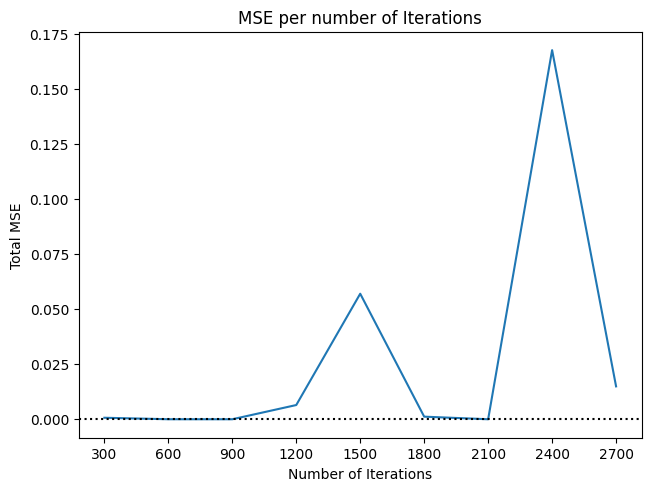

In [20]:
fig, ax = plt.subplots(layout='constrained')
ax.plot(xs, ys)
plt.axhline(y=min(ys), color="black", linestyle=":")
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Total MSE')
ax.set_title('MSE per number of Iterations')
plt.xticks(xs)
plt.show()

In [23]:
ro = rollout_data['ex6']['rollout_ex00_dict.pkl']

In [24]:
true_x = ro['true_x']
pred_x = ro['pred_x']
mat_prop = ro['mat_prop']

In [25]:
true_x.keys()

dict_keys(['H2O', 'SO4', 'H2SO4'])

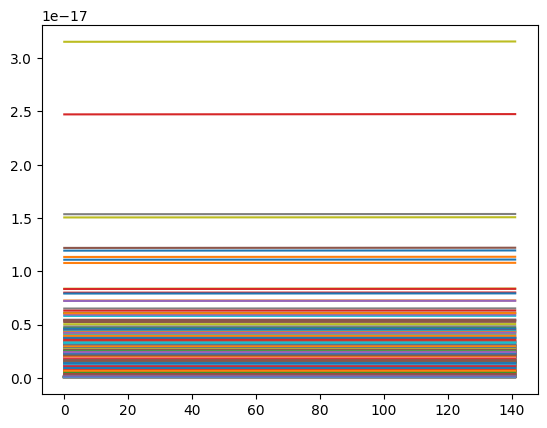

In [26]:
plt.plot(true_x['SO4'])
plt.show()

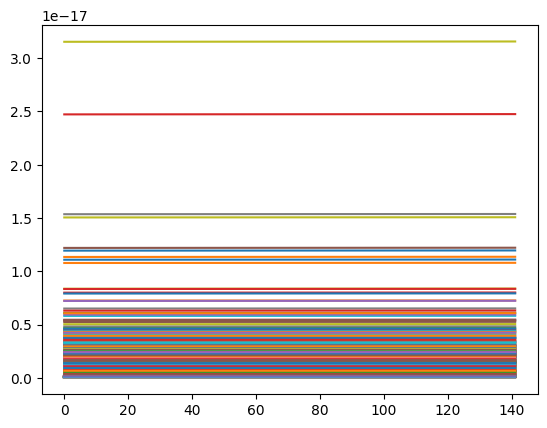

In [27]:
plt.plot(pred_x['SO4'])
plt.show()

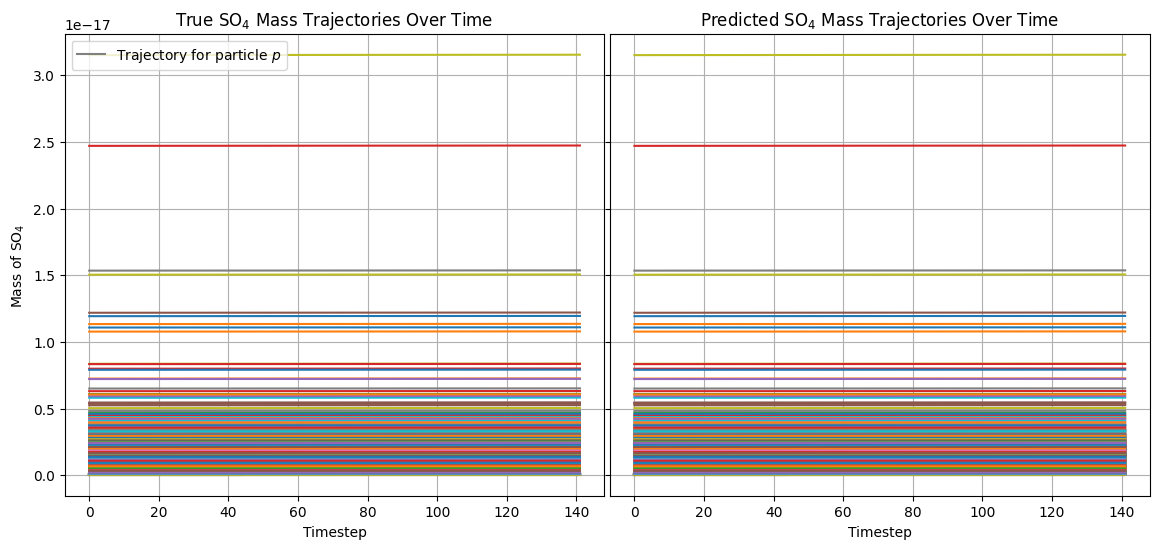

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['SO4'])
ax2.plot(pred_x['SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of SO$_4$')

ax1.set_title('True SO$_4$ Mass Trajectories Over Time')
ax2.set_title('Predicted SO$_4$ Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("so4ex8.png")

In [29]:
ar.nmae(true_x['SO4'], pred_x['SO4'])

2.67899017401099e-06

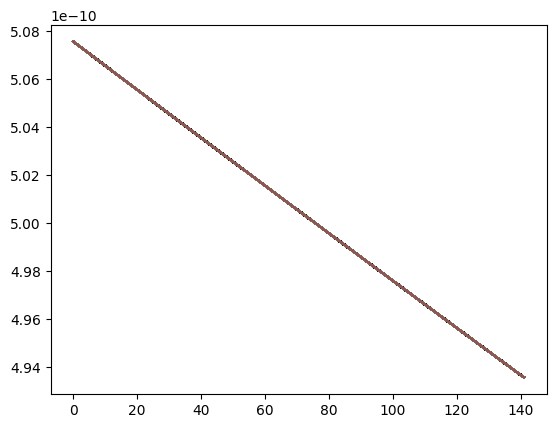

In [30]:
plt.plot(true_x['H2SO4'])
plt.show()

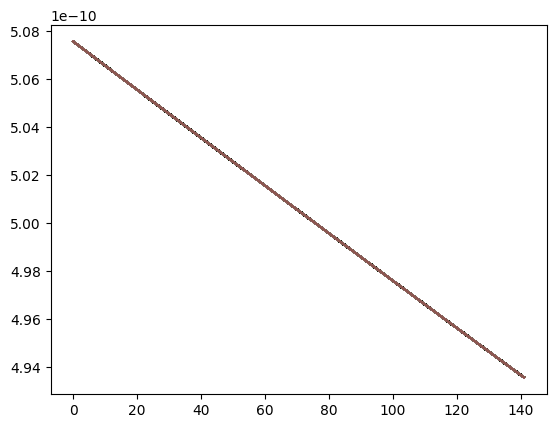

In [31]:
plt.plot(pred_x['H2SO4'])
plt.show()

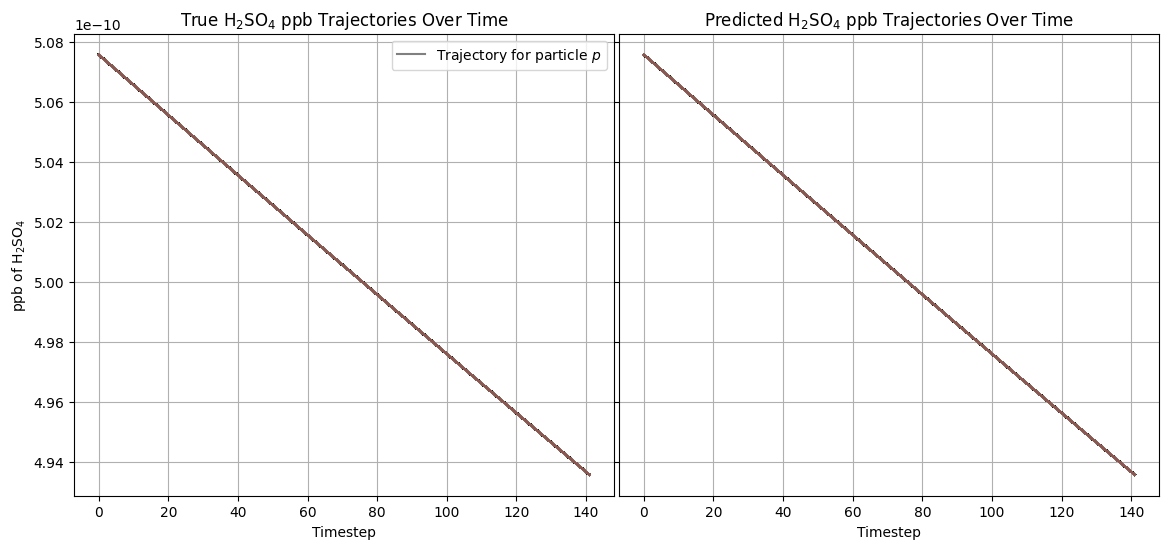

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2SO4'])
ax2.plot(pred_x['H2SO4'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('ppb of H$_2$SO$_4$')

ax1.set_title('True H$_2$SO$_4$ ppb Trajectories Over Time')
ax2.set_title('Predicted H$_2$SO$_4$ ppb Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper right', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2so4ex8.png")

In [33]:
ar.nmae(true_x['H2SO4'], pred_x['H2SO4'])

1.9321962775103173e-06

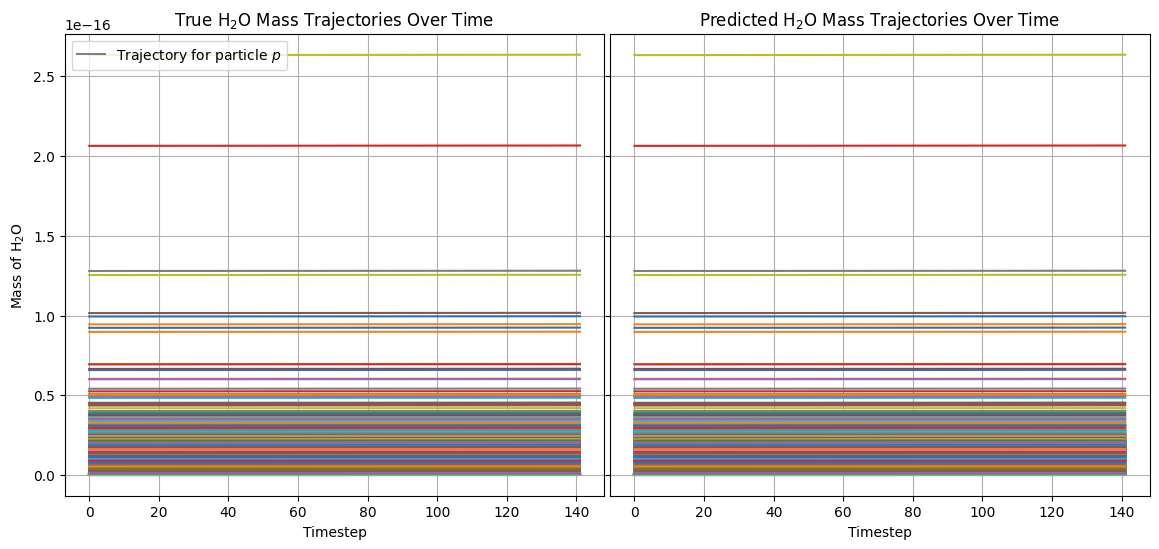

In [34]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(true_x['H2O'])
ax2.plot(pred_x['H2O'])

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Mass of H$_2$O')

ax1.set_title('True H$_2$O Mass Trajectories Over Time')
ax2.set_title('Predicted H$_2$O Mass Trajectories Over Time')

# Add legend for trajectories
ax1.plot([], [], color='gray', label='Trajectory for particle $p$')
ax1.legend(loc='upper left', frameon=True)

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("h2oex8.png")

In [35]:
ar.nmae(true_x['H2O'], pred_x['H2O'])

2.7489351066181034e-06

In [36]:
true_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': true_x['SO4']}

In [37]:
pred_dry_mass = {'BC': mat_prop['BC'], 'OC': mat_prop['OC'], 'SO4': pred_x['SO4']}

In [38]:
so4_diam = ar.gd_from_vol(ar.volume('SO4', true_dry_mass))

In [39]:
pred_so4_diam = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass))

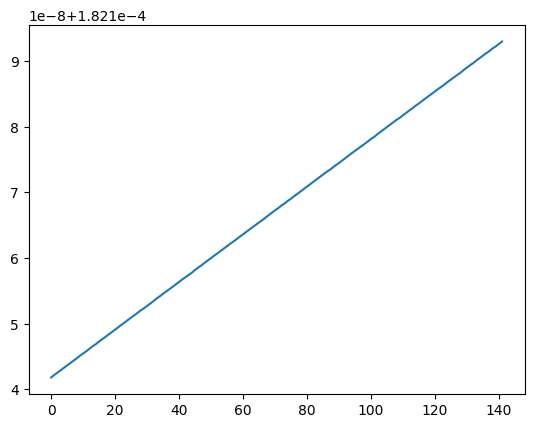

In [40]:
plt.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))

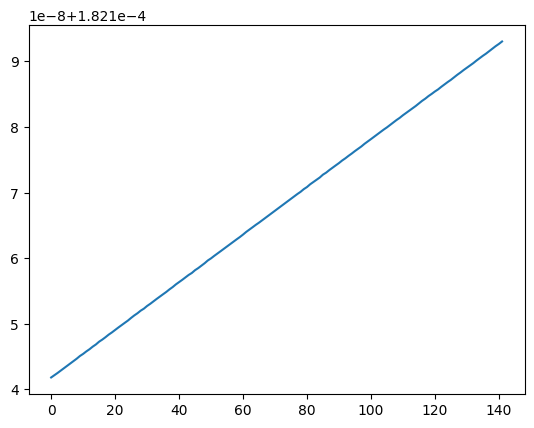

In [41]:
plt.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

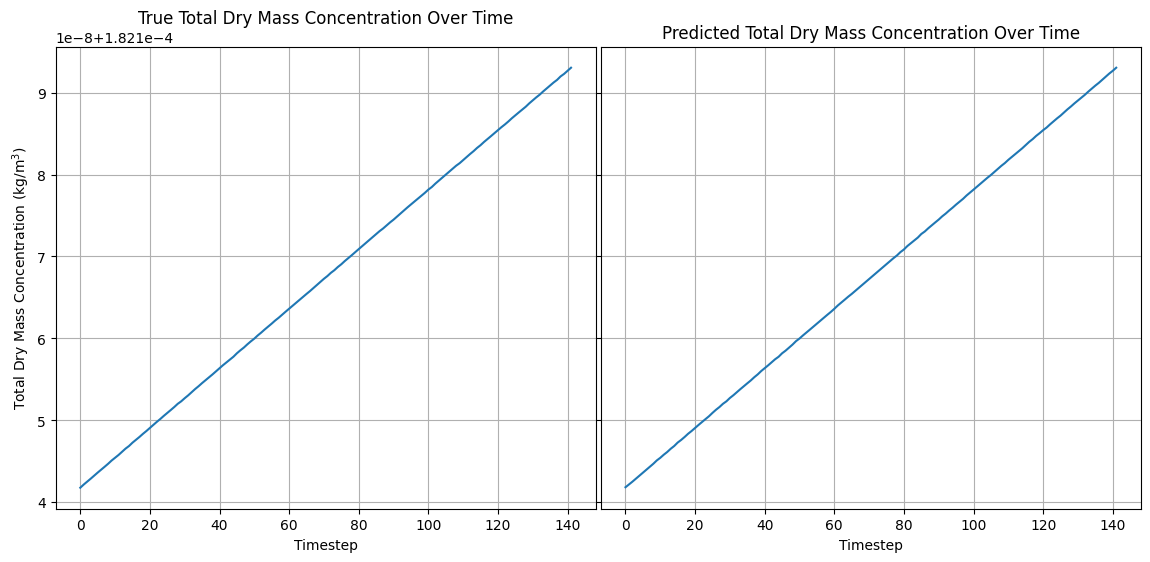

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
ax1.plot(ar.mass_concentration(true_dry_mass, mat_prop['aero_number'], chem='all'))
ax2.plot(ar.mass_concentration(pred_dry_mass, mat_prop['aero_number'], chem='all'))

# Add labels and title
ax1.set_xlabel('Timestep')
ax2.set_xlabel('Timestep')
ax1.set_ylabel('Total Dry Mass Concentration (kg/m$^3$)')

ax1.set_title('True Total Dry Mass Concentration Over Time')
ax2.set_title('Predicted Total Dry Mass Concentration Over Time')

# Adjust space between subplots
plt.subplots_adjust(wspace=0.01)

# Show plot
ax1.grid(True)
ax2.grid(True)
plt.savefig("dm_conc_ex8.png")

In [43]:
total_true_drymass = sum(true_dry_mass.values())

In [44]:
total_pred_drymass = sum(pred_dry_mass.values())

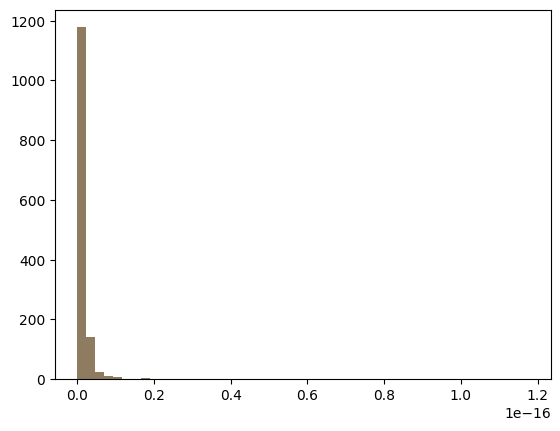

In [45]:
fig, ax = plt.subplots()
ax.hist(total_pred_drymass[-1,:], bins=50)
ax.hist(total_true_drymass[-1,:], bins=50, alpha=0.5)
plt.show()

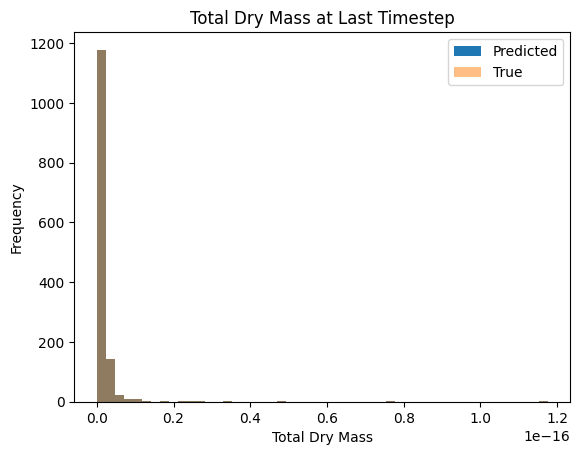

In [46]:
fig, ax = plt.subplots()
ax.hist(total_pred_drymass[-1,:], bins=50, label="Predicted")
ax.hist(total_true_drymass[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Total Dry Mass')
plt.ylabel('Frequency')
plt.title('Total Dry Mass at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dm_hist_ex8.png")

In [47]:
mat_prop['aero_number'].shape

(142, 1376)

In [48]:
dNdt = mat_prop['aero_number'][1:,:] - mat_prop['aero_number'][:-1,:]

In [49]:
true_Ddry = ar.gd_from_vol(ar.volume('SO4', true_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [50]:
pred_Ddry = ar.gd_from_vol(ar.volume('SO4', pred_dry_mass) + ar.volume('BC', true_dry_mass) + ar.volume('OC', true_dry_mass))

In [51]:
true_dDdrydt = true_Ddry[1:,:] - true_Ddry[:-1,:]

In [52]:
pred_dDdrydt = pred_Ddry[1:,:] - pred_Ddry[:-1,:]

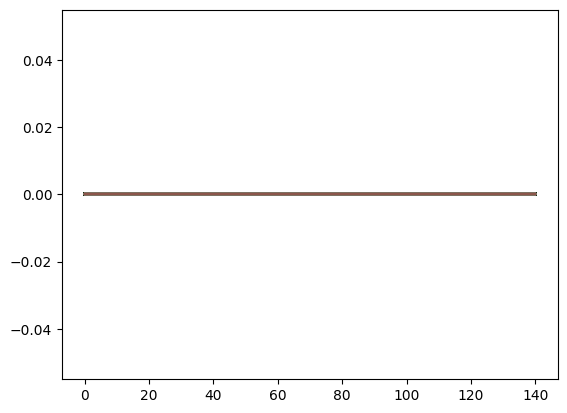

In [53]:
plt.plot(dNdt / pred_dDdrydt)
plt.show()

In [54]:
true_gmean, true_gstd = ar.mean_std_diameter(true_dry_mass)
pred_gmean, pred_gstd = ar.mean_std_diameter(pred_dry_mass)

In [55]:
diams = np.logspace(-9,-6, true_gmean.shape[0])

In [56]:
true_Ddry[-1,:].shape

(1376,)

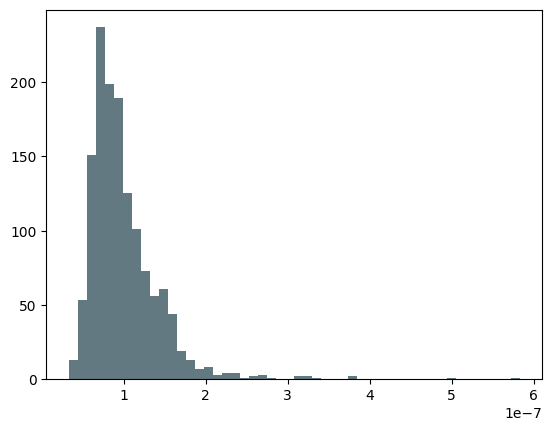

In [57]:
plt.hist(pred_Ddry[-1,:], bins=50)
plt.hist(true_Ddry[-1,:], bins=50, alpha=0.3)
plt.show()

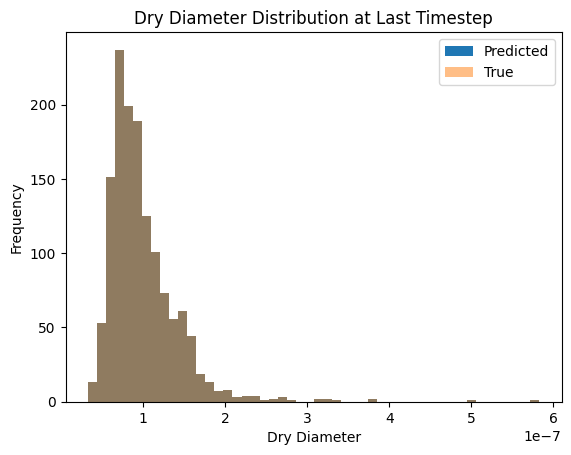

In [58]:
fig, ax = plt.subplots()
ax.hist(pred_Ddry[-1,:], bins=50, label="Predicted")
ax.hist(true_Ddry[-1,:], bins=50, alpha=0.5, label="True")
# Add labels and title
plt.xlabel('Dry Diameter')
plt.ylabel('Frequency')
plt.title('Dry Diameter Distribution at Last Timestep')
# Add legend
plt.legend()
plt.savefig("dd_hist_ex8.png")

In [59]:
def lognormal_distro(number_conc, diams, gmeans, gstds):
    return ((number_conc / (np.sqrt(2*np.pi) * np.log10(gstds))) * 
            np.exp(-0.5 * ((np.log10(diams) - np.log10(gmeans))**2 / (2 * np.log10(gstds)**2))))

In [60]:
true_nD = lognormal_distro(mat_prop['aero_number'], true_Ddry, true_gmean, true_gstd)
pred_nD = lognormal_distro(mat_prop['aero_number'], pred_Ddry, pred_gmean, pred_gstd)

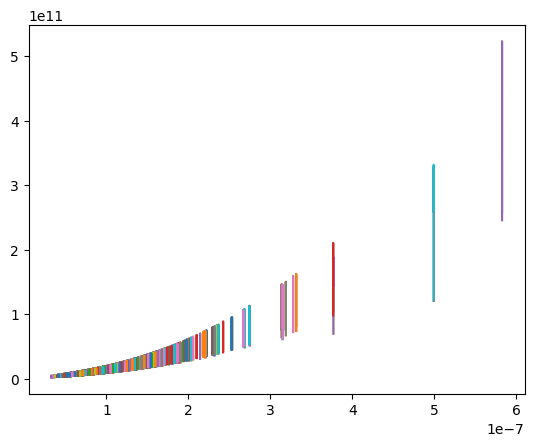

In [61]:
plt.plot(true_Ddry, true_nD)
plt.plot(pred_Ddry, pred_nD)
plt.show()

In [ ]:
# for i in range(0, true_drymass.shape[0], 10):
#     fig, ax = plt.subplots()
#     ax.hist(pred_drymass[i,:], bins=100)
#     ax.hist(true_drymass[i,:], bins=100, alpha=0.5)
#     plt.savefig(f"./figures/hists/hist{i}.png")
#     plt.close()